# data ready

In [45]:
import os
import cv2
import numpy as np
import sys
from PIL import Image, ImageDraw, ImageFont
import random
import json
import numpy as np

def make_image(test_str, fonttype, fontsize,target_width ,target_height, 
               back_ground_img_list, blurs=((3,3),(4,4),(5,5)), 
               need_include=True, fonts_name=''):
    font = ImageFont.truetype(fonttype, fontsize)
    text_width, text_height = font.getsize(test_str)
    pd = 20
    bg_img = cv2.imread(bg_file_lists[np.random.randint(len(back_ground_img_list))],cv2.IMREAD_COLOR)
    bg_img = cv2.resize(bg_img, (target_width, target_height), interpolation=cv2.INTER_AREA)
    image = Image.fromarray(cv2.cvtColor(bg_img,cv2.COLOR_BGR2RGB)) 
#     image = Image.new("RGB", (text_width+pd, text_height), (255,255,255))
    draw = ImageDraw.Draw(image)
    draw_str = list(test_str)
#     if len(draw_str) > 3:
#         draw_str_npos = np.random.randint(1,len(draw_str)-1)
#         draw_str.insert(draw_str_npos, ' '*np.random.randint(1,3))
    
    draw_str = ''.join(draw_str)
    

    #   增加一些括号特征
    if need_include:
        left_str = '(('
        right_str = '))'
        in_random = np.random.randint(3)
        if in_random <= 1:
            if in_random == 0:
                draw_str = '{}{}{}'.format(left_str[in_random], draw_str, right_str[in_random])
            else:
                draw_str = '{} {} {}'.format(left_str[in_random], draw_str, right_str[in_random])
            draw.text((pd/2 + np.random.randint(-5,2), np.random.randint(3)), draw_str, (0,0,0), font=font)
        else:
            draw.text((pd/2 + np.random.randint(-5,2), np.random.randint(3)), draw_str, (0,0,0), font=font)
    else:
        draw.text((pd/2 + np.random.randint(-5,2), np.random.randint(3)), draw_str, (0,0,0), font=font)
        
    #绘制噪点
    if np.random.randint(10)<7:
        for i in range(0, 100):
            xy = (random.randrange(0, target_width), random.randrange(0, target_height))
            if i%2 == 0:
                fill_color = (255, 255, 255)
            else:
                fill_color = (0, 0, 0)
            draw.point(xy, fill=fill_color)
        
        
    image = cv2.cvtColor(np.asarray(image),cv2.COLOR_RGB2BGR)  
#     image = cv2.cvtColor(image,cv2.COLOR_RGB2GRAY)  
#     image = cv2.cvtColor(image,cv2.COLOR_GRAY2RGB)     
    #  图像模糊
    if np.random.randint(10)<7:
#         image = cv2.GaussianBlur(image,(0,0),round(np.random.uniform(0.90,1),2))    
        image = cv2.blur(image,(np.random.randint(3,6), np.random.randint(3,6)))
    open_cv_image = image.copy()
    open_cv_image = open_cv_image[:, :, ::-1].copy()
    dif = open_cv_image.shape[0] - target_height
    if dif > 0:
        open_cv_image = open_cv_image[:-dif]
    else:
        fill = np.full((target_height, open_cv_image.shape[1], open_cv_image.shape[2]), 255, np.uint8)
        fill[:open_cv_image.shape[0],:,:] = open_cv_image
        open_cv_image = fill
    return open_cv_image

def gen_words(file_name, alphas, max_number=6, total=1000, noise_alpha=None):
    with open(file_name, 'w') as f:
        for _ in range(total):
            line = []
#             for _ in range(np.random.randint(max_number)+1):
            for _ in range(max_number):
                line.append(alphas[np.random.randint(len(alphas))])
                if noise_alpha and np.random.randint(3)==1:
                    line.append(noise_alpha[np.random.randint(len(noise_alpha))])
            line.append('\n')
            line = ''.join(line)
            f.write(line)

In [27]:
'''
随机生成测试测试数据
'''
# file_name = '/project/data/digest_words.txt'
file_name = '/project/data/alpha_words.txt'
# alpha = '0123456789+-÷×=)(＋－（）'
# alpha = '0123456789.'
# alpha = 'abcdefghijklmnopqrstuvwxyzABCDEFGHIJKLMNOPQRSTUVWXYZ,.'
# 先支持大写
alpha = 'ABCDEFGHIJKLMNOPQRSTUVWXYZ'
# noise_alpha='~` '
noise_alpha=None
gen_words(file_name, alpha,total=100000, max_number=4, noise_alpha=noise_alpha)


In [79]:
import shutil
'''
生成手写体图片
'''
path = '/project/data'
# text_lines_path = '{}/digest_words.txt'.format(path)
text_lines_path = '{}/alpha_words.txt'.format(path)
fonts_path = '{}/fonts_hw'.format(path)
noise_alpha='~` '
# fonts_path = '{}/fonts'.format(path)

r = random.Random(0)
with open(text_lines_path) as f:
    text_lines = f.readlines()
text_lines = [t.strip() for t in text_lines]
text_lines = [t for t in text_lines if len(t) > 0]

all_fonts_name = []
all_fonts = []
for root, dirs, files in os.walk(fonts_path):
    for file in files:
        if file.endswith(".ttf"):
            all_fonts.append(os.path.join(root, file))
            all_fonts_name.append(file[:-4])

output_path = "{}/images".format(path)
# 清空目录
shutil.rmtree(output_path)  
os.mkdir(output_path) 

output_data =[]
b_image_path = '{}/background'.format(path)
bg_file_lists = ['{}/{}'.format(b_image_path, x) for x in os.listdir(b_image_path)]

try:
    os.makedirs(output_path)
except:
    pass

# img_height = 32
# img_width = 100
# font_size_list = [20,24]
number_of_examples = 100000

text_set = [[32, 100, [20,24]],[64,200,[30,28]],[48,150,[26,24]]]
# text_set = [[32, 100, [20,24]]]

for i, txt in enumerate(random.sample(text_lines, number_of_examples)):
    if i%1000 == 0:
        print(i)
    img_height, img_width, font_size_list = text_set[np.random.randint(len(text_set))]
    font_size = font_size_list[np.random.randint(len(font_size_list))]
    select_font_idx = np.random.randint(len(all_fonts))
    img = make_image(txt, all_fonts[select_font_idx], 
                     font_size,img_width, img_height, 
                     bg_file_lists, 
                     need_include=True)
    img_path = os.path.join(output_path, "{}_{}.png".format(str(i), all_fonts_name[select_font_idx]))
    cv2.imwrite(img_path, img)
    #   需修改，增加对全角符号的转换
    txt = txt.replace('＋','+')
    txt = txt.replace('－','-')
    txt = txt.replace('（','(')
    txt = txt.replace('）',')')
    
    for item in list(noise_alpha):
        txt = txt.replace(item, '')
    output_data.append({
        "image_path": "{}_{}.png".format(str(i), all_fonts_name[select_font_idx]),
        "gt": txt.lower()
    })
    
train_cnt = int(number_of_examples * 1.0)
val_cnt = number_of_examples - train_cnt
with open("{}/training.json".format(path), 'w') as f:
    json.dump(output_data[:train_cnt], f)

with open("{}/validation.json".format(path), 'w') as f:
    json.dump(output_data[train_cnt:], f)

0
100
200
300
400
500
600
700
800
900
1000
1100
1200
1300
1400
1500
1600
1700
1800
1900
2000
2100
2200
2300
2400
2500
2600
2700
2800
2900
3000
3100
3200
3300
3400
3500
3600
3700
3800
3900
4000
4100
4200
4300
4400
4500
4600
4700
4800
4900
5000
5100
5200
5300
5400
5500
5600
5700
5800
5900
6000
6100
6200
6300
6400
6500
6600
6700
6800
6900
7000
7100
7200
7300
7400
7500
7600
7700
7800
7900
8000
8100
8200
8300
8400
8500
8600
8700
8800
8900
9000
9100
9200
9300
9400
9500
9600
9700
9800
9900
10000
10100
10200
10300
10400
10500
10600
10700
10800
10900
11000
11100
11200
11300
11400
11500
11600
11700
11800
11900
12000
12100
12200
12300
12400
12500
12600
12700
12800
12900
13000
13100
13200
13300
13400
13500
13600
13700
13800
13900
14000
14100
14200
14300
14400
14500
14600
14700
14800
14900
15000
15100
15200
15300
15400
15500
15600
15700
15800
15900
16000
16100
16200
16300
16400
16500
16600
16700
16800
16900
17000
17100
17200
17300
17400
17500
17600
17700
17800
17900
18000
18100
18200
18300
18400
18

In [82]:
'''
生成训练库
'''
import json
from lib.gen_dataset import createDataset
path = '/project/data'
img_path = "{}/images".format(path)
train_file = '{}/training.json'.format(path)
valid_file = '{}/validation.json'.format(path)
with open(train_file,'r') as f:
    train_data = json.load(f)
    

imgLabelLists = []
for item in train_data:
    imgLabelLists.append(('{}/{}'.format(img_path, item['image_path']),str(item['gt'])))

random.shuffle(imgLabelLists)
trainPath = '{}/lmdb'.format(path)   # 训练数据
trainImgPaths = [x[0] for x in imgLabelLists]
trainTxtLists = [x[1] for x in imgLabelLists]
createDataset(trainPath, trainImgPaths, trainTxtLists, lexiconList=None, checkValid=True)


samples length -- > 100000
Written 1000 / 100000
Written 2000 / 100000
Written 3000 / 100000
Written 4000 / 100000
Written 5000 / 100000
Written 6000 / 100000
Written 7000 / 100000
Written 8000 / 100000
Written 9000 / 100000
Written 10000 / 100000
Written 11000 / 100000
Written 12000 / 100000
Written 13000 / 100000
Written 14000 / 100000
Written 15000 / 100000
Written 16000 / 100000
Written 17000 / 100000
Written 18000 / 100000
Written 19000 / 100000
Written 20000 / 100000
Written 21000 / 100000
Written 22000 / 100000
Written 23000 / 100000
Written 24000 / 100000
Written 25000 / 100000
Written 26000 / 100000
Written 27000 / 100000
Written 28000 / 100000
Written 29000 / 100000
Written 30000 / 100000
Written 31000 / 100000
Written 32000 / 100000
Written 33000 / 100000
Written 34000 / 100000
Written 35000 / 100000
Written 36000 / 100000
Written 37000 / 100000
Written 38000 / 100000
Written 39000 / 100000
Written 40000 / 100000
Written 41000 / 100000
Written 42000 / 100000
Written 43000 / 

# Module

In [73]:
import torch
import torch.nn as nn


class BidirectionalLSTM(nn.Module):
    def __init__(self, nIn, nHidden, nOut):
        super(BidirectionalLSTM, self).__init__()
        self.rnn = nn.LSTM(nIn, nHidden, bidirectional=True)
        self.embedding = nn.Linear(nHidden * 2, nOut)

    def forward(self, input):
        recurrent, _ = self.rnn(input)
        T, b, h = recurrent.size()
        t_rec = recurrent.view(T * b, h)
        output = self.embedding(t_rec)  # [T * b, nOut]
        output = output.view(T, b, -1)
        return output
class CRNNHeader(nn.Module):
    def __init__(self, imgH, nc, nh, n_rnn=2, leakyRelu=False):
        super(CRNNHeader,self).__init__()
        assert imgH % 16 == 0, 'imgH has to be a multiple of 16'
        ks = [3, 3, 3, 3, 3, 3, 2]
        ps = [1, 1, 1, 1, 1, 1, 0]
        ss = [1, 1, 1, 1, 1, 1, 1]
        nm = [64, 128, 256, 256, 512, 512, 512]
        cnn = nn.Sequential()

        def convRelu(i, batchNormalization=False):
            nIn = nc if i == 0 else nm[i - 1]
            nOut = nm[i]
            cnn.add_module('conv{0}'.format(i),
                           nn.Conv2d(nIn, nOut, ks[i], ss[i], ps[i]))
            if batchNormalization:
                cnn.add_module('batchnorm{0}'.format(i), nn.BatchNorm2d(nOut))
            if leakyRelu:
                cnn.add_module('relu{0}'.format(i),
                               nn.LeakyReLU(0.2, inplace=True))
            else:
                cnn.add_module('relu{0}'.format(i), nn.ReLU(True))

        convRelu(0)
        cnn.add_module('pooling{0}'.format(0), nn.MaxPool2d(2, 2))  # 64x16x64
        convRelu(1)
        cnn.add_module('pooling{0}'.format(1), nn.MaxPool2d(2, 2))  # 128x8x32
        convRelu(2, True)
        convRelu(3)
        cnn.add_module('pooling{0}'.format(2),
                       nn.MaxPool2d((2, 2), (2, 1), (0, 1)))  # 256x4x16
        convRelu(4, True)
        convRelu(5)
        cnn.add_module('pooling{0}'.format(3),
                       nn.MaxPool2d((2, 2), (2, 1), (0, 1)))  # 512x2x16
        convRelu(6, True)  # 512x1x16
        self.cnn = cnn
        self.head_rnn = BidirectionalLSTM(512, nh, nh)
        
class CRNNClassify(CRNNHeader):
    def __init__(self, imgH, nc, nh, nclass, n_rnn=2, leakyRelu=False):
        super(CRNNClassify, self).__init__(imgH, nc,nh, leakyRelu=leakyRelu)
        self.fc = BidirectionalLSTM(nh,nh, nclass)
        self.dropout = nn.Dropout(0.5)

    def forward(self, input):
        # conv features
        conv = self.cnn(input)
        b, c, h, w = conv.size()
        assert h == 1, "the height of conv must be 1"
        conv = conv.squeeze(2)     # [w, b, c]
        conv = conv.permute(2, 0,  1).contiguous() #   [w b  c]    LSTM 没有指定batch fist时， batch在中间
#         conv = self.dropout(conv)
        output = self.head_rnn(conv)
#         output = self.dropout(output)
        output = self.fc(output)
        return output

# train

In [83]:
import torch
import torch.nn as nn
from torch.utils.data import DataLoader
from torch.autograd import Variable
import lib.dataset as dataset
import lib.utils as utils
import time
import importlib
importlib.reload(dataset)
importlib.reload(utils)



path = '/project'
alpha = 'abcdefghijklmnopqrstuvwxyz'
# alpha = '0123456789.'
# alpha = '0123456789+-÷×=)('
imgH = 32
imgC = 3
nh = 256
batch_size = 100
thread_accuracy = 0.99
def weights_init(m):
    classname = m.__class__.__name__
    if classname.find('Conv') != -1:
        m.weight.data.normal_(0.0, 0.02)
    elif classname.find('BatchNorm') != -1:
        m.weight.data.normal_(1.0, 0.02)
        m.bias.data.fill_(0)
        
# net = CRNNClassify(imgH=imgH,nc=imgC,nh=nh, nclass=len(alpha)+1)
# net.apply(weights_init)

net = torch.load('{}/acrnn_best.pkl'.format(path))
converter = utils.strLabelConverter(alpha)
def valid_net(net, valid_dataset, criterion):
    
    valid_loader = torch.utils.data.DataLoader(
        valid_dataset, batch_size=batch_size,
        shuffle=True,
        collate_fn=dataset.alignCollate(imgH=32, imgW=100))   
    i = 0
    n_correct = 0    
    net.eval()
    with torch.no_grad():
        for step, values in enumerate(valid_loader):
            images = Variable(values[0].type(dtype), requires_grad=False)
            labels = values[1]
            t, l = converter.encode(labels)
            utils.loadData(text, t)
            utils.loadData(length, l)

            preds = net(images).cpu()
            preds_size = Variable(torch.IntTensor([preds.size(0)] * preds.size(1)))

#             loss = criterion(preds, text, preds_size, length) / preds.size(1)
#             print('pred size -->{}'.format(preds.size()))
            _, preds = preds.max(2)
#             print('max pred size -->{}'.format(preds.size()))
#             preds = preds.squeeze(2)
            preds = preds.transpose(1, 0).contiguous().view(-1)
            sim_preds = converter.decode(preds.data, preds_size.data, raw=False)

            for pred, target in zip(sim_preds, labels):
                if pred == target.lower():
                    n_correct += 1        
    print('sim preds -->{}'.format(sim_preds))
    print('text -->{}'.format(labels))
    accuracy = n_correct / float(len(valid_dataset))
    return accuracy, n_correct

text = torch.IntTensor(batch_size * 5)
length = torch.IntTensor(batch_size)

text = Variable(text,requires_grad=False)
length = Variable(length,requires_grad=False)


idx_to_char = {k:v for k,v in enumerate(alpha)}
char_to_idx = {v:k for k,v in enumerate(alpha)}


train_dataset = dataset.lmdbDataset(root='{}/data/lmdb'.format(path))
print('train data set length -->{}'.format(len(train_dataset)))
train_set, val_set = torch.utils.data.random_split(train_dataset,
                                                   [int(0.9*len(train_dataset)), 
                                                    int(0.1*len(train_dataset))])
assert train_dataset
# # 初始训练的时候生成的图片
# scale = 32/60   训练图片大小：(200, 60)
# scale = 32/32
train_loader = torch.utils.data.DataLoader(
    train_set, batch_size=batch_size,
    shuffle=True,
    collate_fn=dataset.alignCollate(imgH=32, imgW=100, keep_ratio=False))




if torch.cuda.is_available():
    net.cuda()
    dtype = torch.cuda.FloatTensor
    print("Using GPU")
else:
    dtype = torch.FloatTensor
    print("No GPU detected")

optimizer = torch.optim.Adam(net.parameters(), lr=1e-4,betas=(0.5, 0.999))
# optimizer = torch.optim.RMSprop(net.parameters(), lr=1e-2)
criterion = nn.CTCLoss()
lowest_loss = float('inf')

current_accuracy = 0.0
start_time = time.time()
for epoch in range(10000):
    net.train()
    loss = None
    
    sum_loss = 0.0
    total_step = 0    
    for step, values in enumerate(train_loader):
        images = Variable(values[0].type(dtype), requires_grad=False)
        labels = values[1]
        t, l = converter.encode(labels)
        utils.loadData(text, t)
        utils.loadData(length, l)
        
        
        preds = net(images).cpu()
        preds_size = Variable(torch.IntTensor([preds.size(0)] * preds.size(1)))
        
        loss = criterion(preds, text, preds_size, length) / preds.size(1)
        
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()        
        
    if epoch % 10 == 0:
        accuracy, num_correct = valid_net(net,val_set,loss)
        if accuracy > current_accuracy:
            current_accuracy = accuracy
            torch.save(net, '{}/save/acrnn_{}.pkl'.format(path,epoch))
            torch.save(net.state_dict(), '{}/save/acrnn_{}.pkh'.format(path,epoch))
        
        
        print('epoch --> {} loss -->{} accuracy -->{} correct --> {}, time {}'.format(epoch, loss,accuracy,num_correct,(time.time()-start_time))) 
        start_time = time.time()
        if current_accuracy >= thread_accuracy:
            break
        

        

print('over ..............')

#         print(values[1])
#         break
        
#         labels = Variable(values[1], requires_grad=False)
#         print('image shape -->{}'.format(images.size()))


train data set length -->100000
Using GPU
sim preds -->['ikbx', 'mzpv', 'zget', 'udqt', 'rfft', 'gnnw', 'cgfm', 'hnnm', 'cdlu', 'sfql', 'gytn', 'lxot', 'mtuj', 'xjcm', 'nzph', 'ldwd', 'ecqf', 'tpdk', 'nokb', 'gsml', 'hdmx', 'acdk', 'vgvt', 'jmtj', 'tdtb', 'evvx', 'kzrh', 'osst', 'qmuz', 'rnpk', 'bxxk', 'defw', 'uawq', 'qgln', 'nori', 'fvni', 'ebbe', 'khrs', 'xjjg', 'rgzd', 'meve', 'uoxt', 'zjgn', 'yjds', 'stnk', 'dkel', 'bqdl', 'lngd', 'ewgm', 'ewa', 'eage', 'slcp', 'ouqh', 'umdl', 'ljek', 'boqr', 'upok', 'yhbr', 'mbgz', 'adtk', 'kiqt', 'lnc', 'utxa', 'nia', 'enrk', 'khif', 'bdsr', 'njmw', 'riam', 'pxhz', 'mvta', 'gkbf', 'wldn', 'uyqr', 'bjib', 'spum', 'ufcx', 'mtrm', 'uko', 'kbuc', 'rbve', 'hdlo', 'qwsq', 'xevf', 'telf', 'eyij', 'gdfc', 'vibj', 'veeg', 'szyj', 'buyw', 'wgra', 'rvoj', 'xbkh', 'vdxx', 'qauf', 'ergr', 'qglb', 'eyjx', 'gnts']
text -->('ikbx', 'mzpv', 'zget', 'udqt', 'rfft', 'gmnw', 'cgfm', 'hnmm', 'cdlu', 'sfql', 'gytn', 'lxot', 'mtuj', 'xjcm', 'nzph', 'ldwd', 'ilqf', 'tp

sim preds -->['bcil', 'xcjz', 'vkyb', 'ngoi', 'ivkd', 'gtof', 'zzch', 'vjzw', 'ievy', 'vvxg', 'rkpl', 'mara', 'wnjw', 'ngef', 'viuh', 'sznd', 'wqjg', 'ncxi', 'zjhr', 'ybqi', 'fmgr', 'vfpo', 'uhmg', 'krkv', 'hbzi', 'ebom', 'vgzl', 'gjez', 'jqiv', 'yxto', 'bogd', 'lcjs', 'rzdb', 'wzip', 'sbhx', 'shym', 'lcyk', 'xijs', 'tswv', 'wwnf', 'rkkx', 'sunx', 'obqg', 'zivn', 'ppwp', 'zfwy', 'xpcp', 'urhm', 'coth', 'xsjw', 'hcqq', 'pryy', 'lqjd', 'crix', 'gwyq', 'xjjg', 'fisv', 'fbrr', 'viej', 'iewm', 'mmxd', 'sobh', 'yqat', 'pgey', 'omie', 'mzkp', 'zwto', 'xcte', 'cikp', 'mdcl', 'nlnm', 'alev', 'bbdh', 'azfd', 'ticz', 'wzfg', 'buec', 'khvz', 'iciv', 'psrn', 'tvho', 'qifx', 'xbyp', 'fudo', 'poja', 'jydj', 'yfhp', 'bmwr', 'phcn', 'fwla', 'xknj', 'tuug', 'nyna', 'xprm', 'lhti', 'byjn', 'lkel', 'tpwe', 'abds', 'test']
text -->('bcil', 'xojz', 'vkyb', 'ngoi', 'ivkd', 'gtof', 'zzch', 'vjzw', 'ievy', 'vvxg', 'rkpl', 'mara', 'wnjw', 'ngef', 'viuh', 'sznd', 'wqjg', 'ncxi', 'zjhr', 'ybqi', 'fmgr', 'vfpo', '

# check

['81606_GloriaHallelujah.png', '62197_MV Boli.png', '52665_MV Boli.png', '7888_Lxgzxk.png', '16463_simple.png', '69287_DancingScript-Regular.png', '7784_Hyfyfy.png', '60285_simsun.png', '73270_MV Boli.png', '82938_ChineseHWB.png']


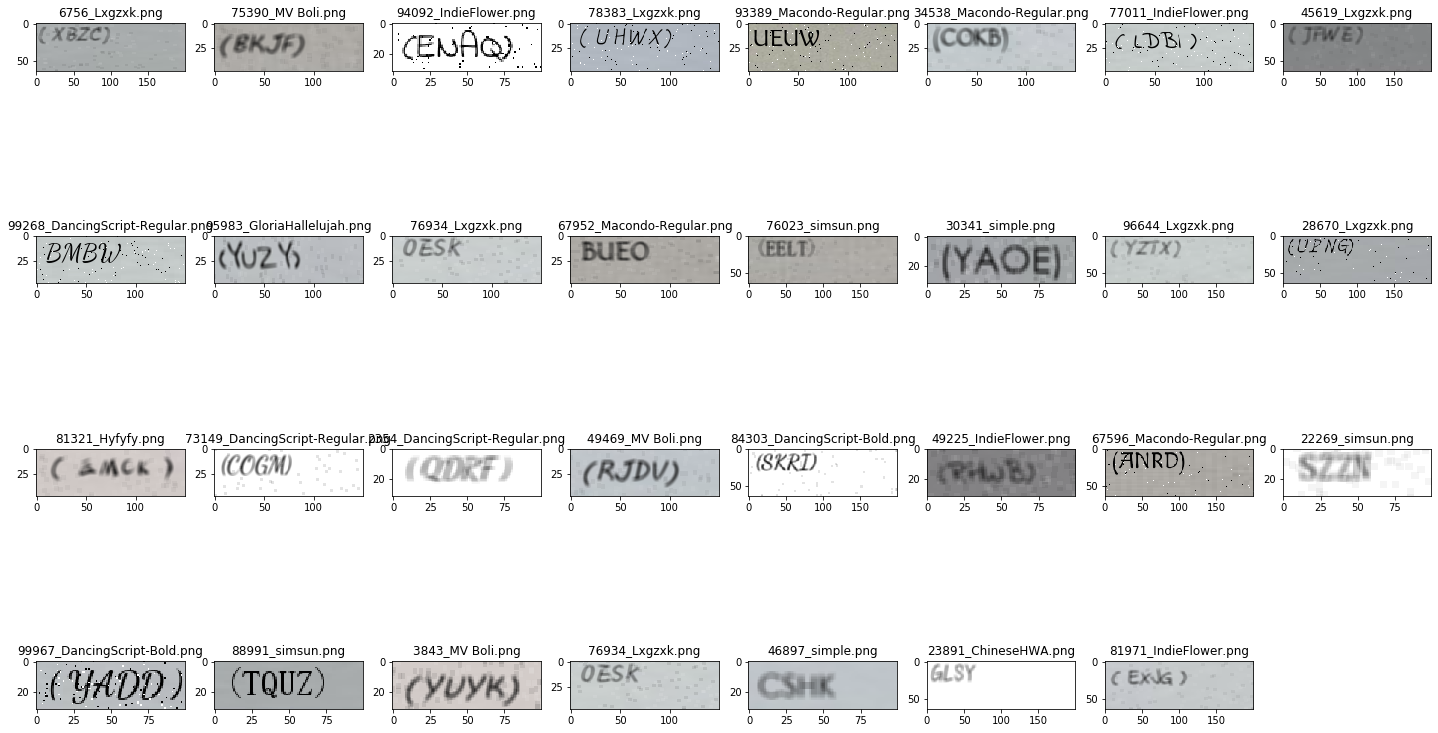

In [81]:
import torch
from PIL import Image
from torch.autograd import Variable
import lib.dataset as dataset
import importlib
import cv2
import matplotlib.pyplot as plt
import numpy as np
import lib.utils as utils
import os
plt.rcParams['figure.figsize'] = 25, 15

path = '/project'
images_path = '{}/data/images'.format(path)
images_files = []
images_files_name = []
for root, dirs, files in os.walk(images_path):
    for file in files:
        images_files.append(os.path.join(root,file ))
        images_files_name.append(file)
print(images_files_name[0:10])

number = 1000

plt.figure()
for i in range(1,32):
    select_number = np.random.randint(number)
    image = Image.open(images_files[select_number])
    plt.subplot(4,8,i)
    plt.title(images_files_name[select_number])
    plt.imshow(image,'brg')
# plt.imshow(image,'brg')
plt.show()

(150, 48)
transform image size -->torch.Size([1, 3, 32, 100])
torch.Size([1, 3, 32, 100])
tensor([ 0,  0,  0,  9,  0,  0,  0, 11,  0,  0,  0,  0,  0,  0, 17, 17,  0, 16,
        16,  0,  0,  0,  0,  0,  0,  0])
8+()


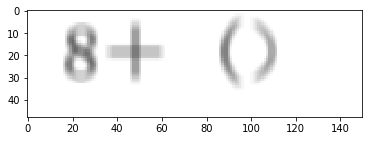

In [54]:
import torch
from PIL import Image
from torch.autograd import Variable
import lib.dataset as dataset
import importlib
import cv2
import matplotlib.pyplot as plt
import lib.utils as utils
importlib.reload(dataset)
# alpha = 'abcdefghijklmnopqrstuvwxyz'
# alpha = '0123456789.'
alpha = '0123456789+-÷×=)('
converter = utils.strLabelConverter(alpha)
path = '/project'
net = torch.load('{}/dhwcrnn_best.pkl'.format(path),map_location=torch.device('cpu'))
torch.save(net.state_dict(), '{}/dhwcrnn_best.pkh'.format(path))
# net = torch.load('{}/save/acrnn_170.pkl'.format(path))
# print(net)


image = Image.open('{}/data/images/12589.png'.format(path))
# image = Image.open('{}/data/test/char2.jpg'.format(path))
print(image.size)
scale = 32/image.size[1]

transformer = dataset.resizeNormalize((int(image.size[0]*scale),32))
origin_image = image.copy()
image = transformer(image)
image = image.unsqueeze(0)
print('transform image size -->{}'.format(image.size()))
image = Variable(image)
# image = image.cuda()


print(image.size())
output = net(image)
_,preds = output.max(2)
preds = preds.squeeze(-2)
preds = preds.view(-1)
print(preds)
preds_size = Variable(torch.IntTensor([preds.size(0)]))
words = converter.decode(preds.data, preds_size, raw=False)
print(words)

plt.imshow(origin_image,'gray')
plt.show()